In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras 
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn import svm

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [2]:
df = pd.read_csv("C://Users//DHRUV.DESKTOP-KRBVT38//OneDrive//Desktop//Work//Project//Devanagri project//data.csv")
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


C:\Users\DHRUV.DESKTOP-KRBVT38\AppData\Local\Temp/ipykernel_21732/1055961398.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(4,4))


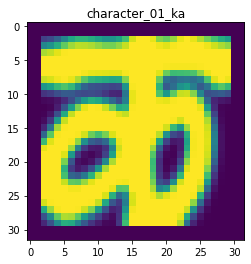

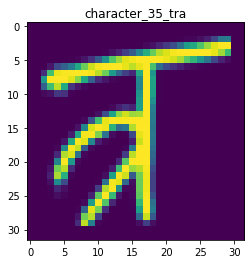

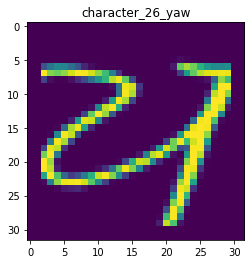

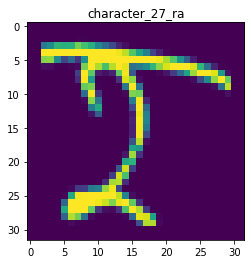

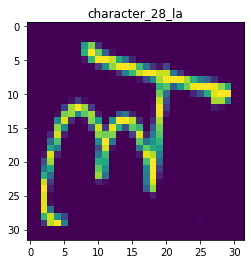

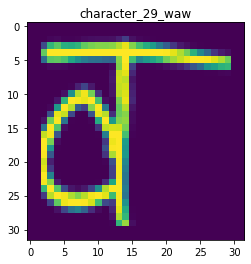

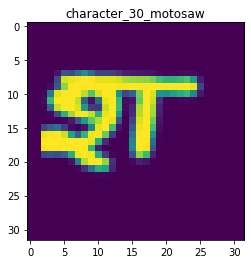

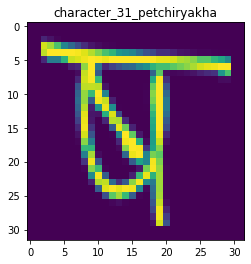

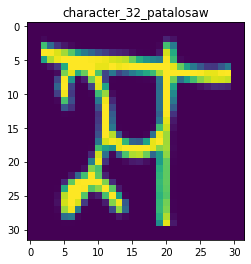

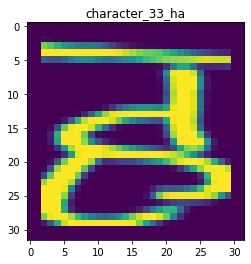

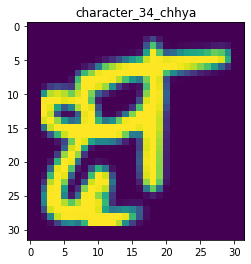

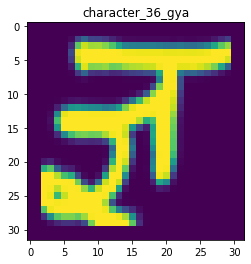

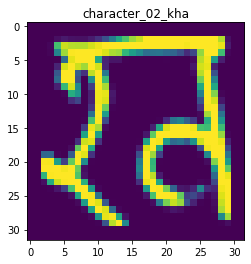

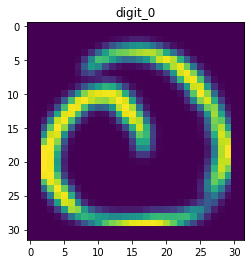

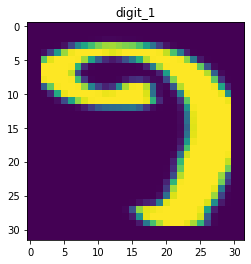

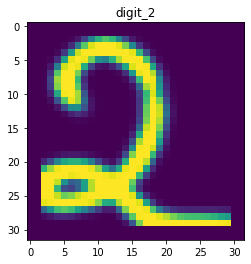

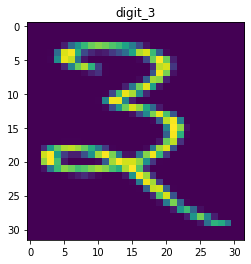

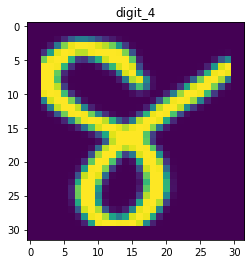

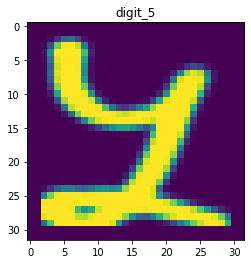

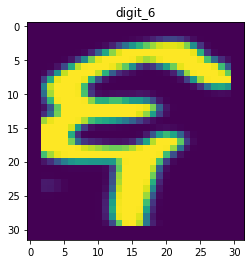

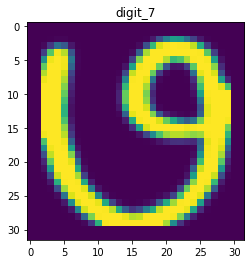

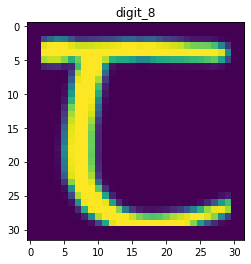

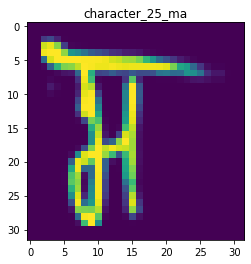

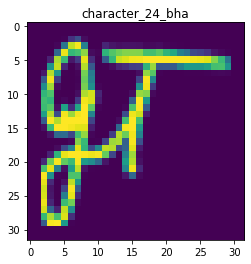

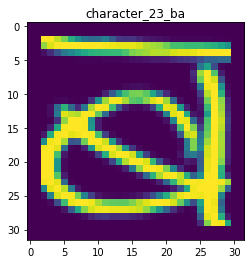

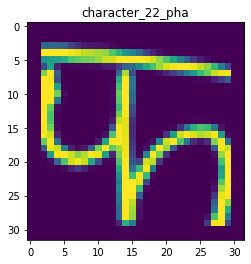

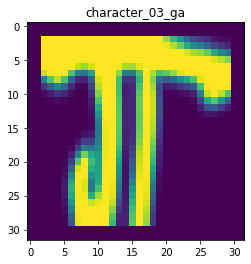

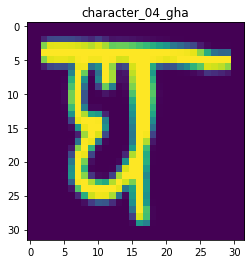

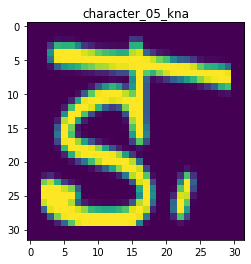

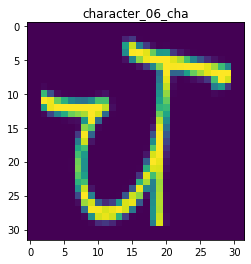

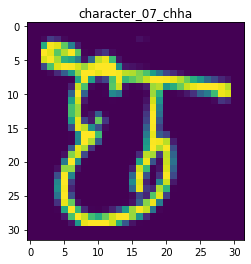

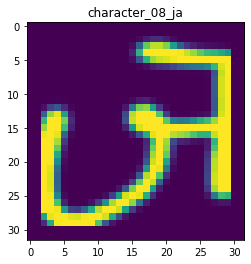

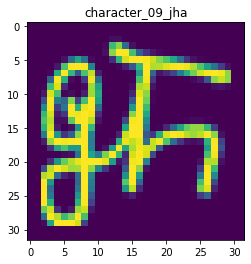

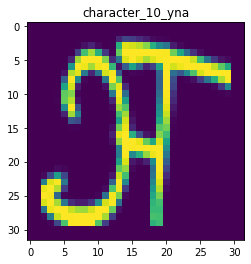

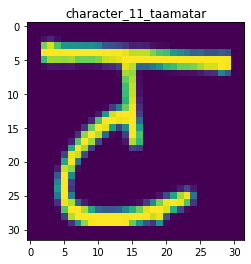

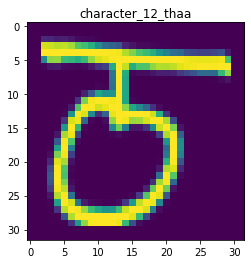

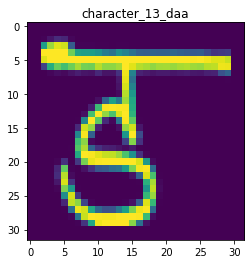

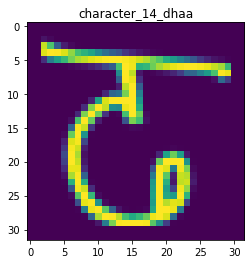

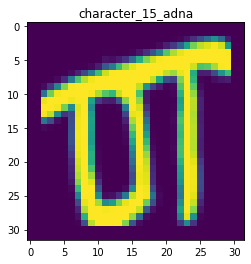

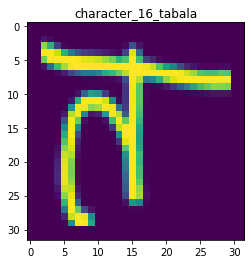

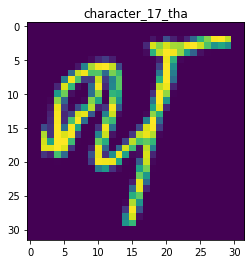

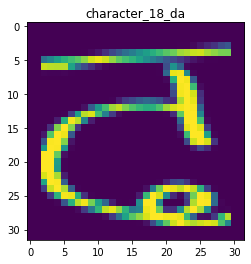

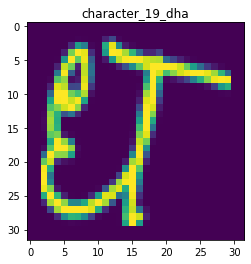

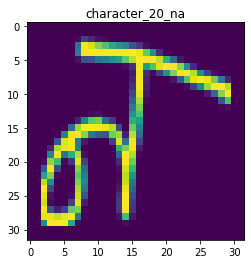

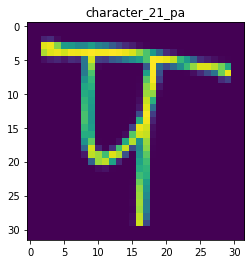

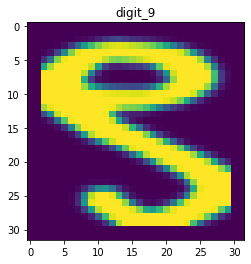

In [3]:
char = df['character'].value_counts().index
char = char.tolist()

for name in char:
    plt.figure(figsize=(4,4))
    image = (df[df['character']==name].head(1))
    image = image.iloc[:,:-1].values.reshape(32,32).astype('int32')
    plt.imshow(image)
    plt.title(name)

In [4]:
X = df.iloc[:,:-1]
y = df['character']

In [5]:
# Transforming the data to feed to the model.

# Shape: (data.shape, size of image, feature map)
X = X.values.reshape(X.shape[0],32,32,1)

# LabelBinarizer is like one-hot-encoding but OneHotEncoder needs data in integer encoded form first to convert into its respective encoding which is not required in the case of LabelBinarizer.
y = LabelBinarizer().fit_transform(y)

In [6]:
# Splitting data into train and test set.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=101)

X_train, X_test = X_train/255, X_test/255

In [7]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), input_shape=(32,32,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(.015))

model.add(Flatten())
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 flatten (Flatten)           (None, 512)               0

In [8]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [10]:
es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience= 4 , verbose =1)
mc = ModelCheckpoint("./bestmodel.h5", monitor="val_acc", verbose = 1, save_best_only=True )
cb =[es,mc]


In [11]:
model.fit(X_train, y_train, epochs =10 , validation_split=0.3, callbacks =cb)

Epoch 1/10
1610/1610 [==============================] - 44s 25ms/step - loss: 0.9014 - accuracy: 0.7502 - val_loss: 0.4190 - val_accuracy: 0.8787
Epoch 2/10
1610/1610 [==============================] - 38s 24ms/step - loss: 0.3494 - accuracy: 0.8982 - val_loss: 0.2955 - val_accuracy: 0.9140
Epoch 3/10
1610/1610 [==============================] - 40s 25ms/step - loss: 0.2469 - accuracy: 0.9262 - val_loss: 0.2496 - val_accuracy: 0.9264
Epoch 4/10
1610/1610 [==============================] - 40s 25ms/step - loss: 0.1938 - accuracy: 0.9412 - val_loss: 0.2340 - val_accuracy: 0.9313
Epoch 5/10
1610/1610 [==============================] - 42s 26ms/step - loss: 0.1572 - accuracy: 0.9517 - val_loss: 0.2134 - val_accuracy: 0.9382
Epoch 6/10
1610/1610 [==============================] - 42s 26ms/step - loss: 0.1336 - accuracy: 0.9584 - val_loss: 0.1987 - val_accuracy: 0.9433
Epoch 7/10
1610/1610 [==============================] - 45s 28ms/step - loss: 0.1122 - accuracy: 0.9640 - val_loss: 0.1890 -

In [18]:
model.save('devanagaclassifier.h5')

In [20]:
from keras.models import load_model
model2 = load_model('devanagaclassifier.h5')

In [21]:
score = model2.evaluate(X_test, y_test)
print(f"the model accuracy is {score[1]}")

575/575 [==============================] - 5s 8ms/step - loss: 0.2061 - accuracy: 0.9464
the model accuracy is 0.9464130401611328
